# import modules and data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(font_scale = 1.5)
plt.style.use("seaborn-dark")

In [2]:
df = pd.read_csv("train.csv")
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


## quick look at target distribution

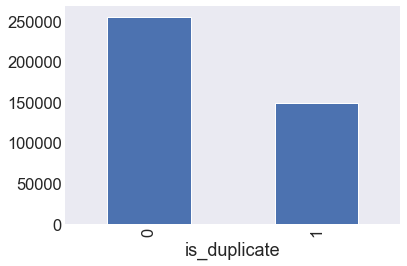

In [16]:
df.groupby('is_duplicate')['id'].count().plot.bar();

In [4]:
print('Total pairs for training       {}'.format(len(df)))
print('Not similar question      [0]  {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('Similar question          [1]  {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

Total pairs for training       404290
Not similar question      [0]  63.08%
Similar question          [1]  36.92%


## take a look at the questions

In [5]:
qid_list = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
num_unique_questions = len(np.unique(qid_list))
repeat_questions = np.sum(qid_list.value_counts() > 1)

print('Total unique questions     {}'.format(num_unique_questions))
print('Total repeat questions     {} ({}%)'.format(repeat_questions,repeat_questions/num_unique_questions*100))
print('Highest repeat count       {}'.format(max(qid_list.value_counts())))

Total unique questions     537933
Total repeat questions     111780 (20.77953945937505%)
Highest repeat count       157


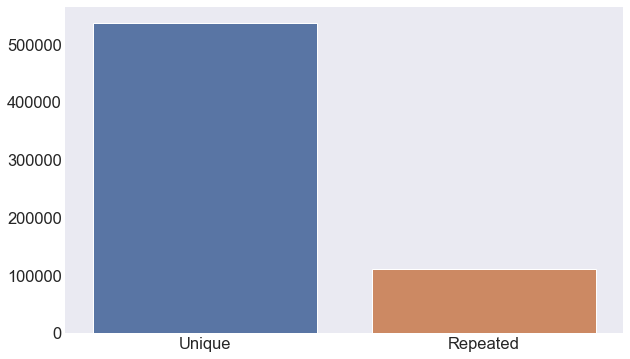

In [17]:
x = ["Unique" , "Repeated"]
y =  [num_unique_questions , repeat_questions]

plt.figure(figsize=(10, 6))
sns.barplot(x = x, y = y)
plt.show()

## take a look at the number of words in the rows

In [7]:
df['q1_num_words'] = df.question1.apply(lambda x: len(str(x).split()))
df['q2_num_words'] = df.question2.apply(lambda x: len(str(x).split()))
df['total_num_words'] = df['q1_num_words'] + df['q2_num_words']
df['differ_num_words'] = abs(df['q1_num_words'] - df['q2_num_words'])

In [8]:
df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_num_words,q2_num_words,total_num_words,differ_num_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,14,12,26,2
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,8,13,21,5


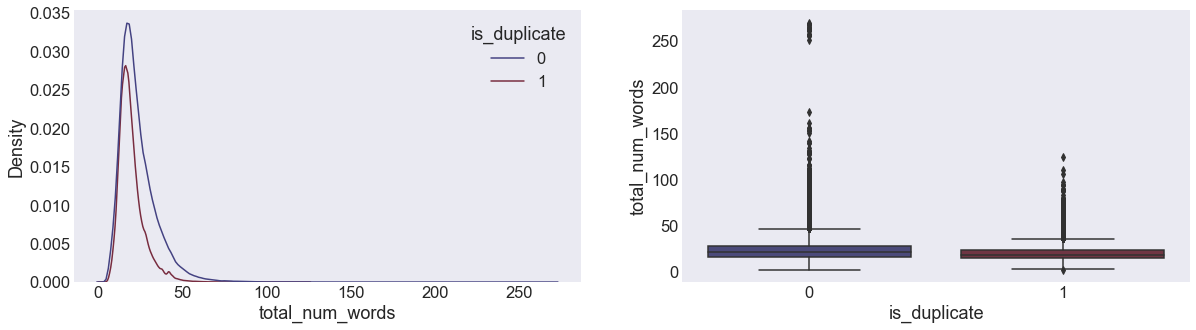

In [18]:
fig, ax = plt.subplots(1,2,figsize = (20,5))
sns.kdeplot(df['total_num_words'], hue = df.is_duplicate, palette = "icefire", ax = ax[0])
sns.boxplot(x = df.is_duplicate, y = df['total_num_words'], palette = "icefire", ax = ax[1])
plt.show()

## see how many times questions are reused

Maximum number of times a single question is repeated 157


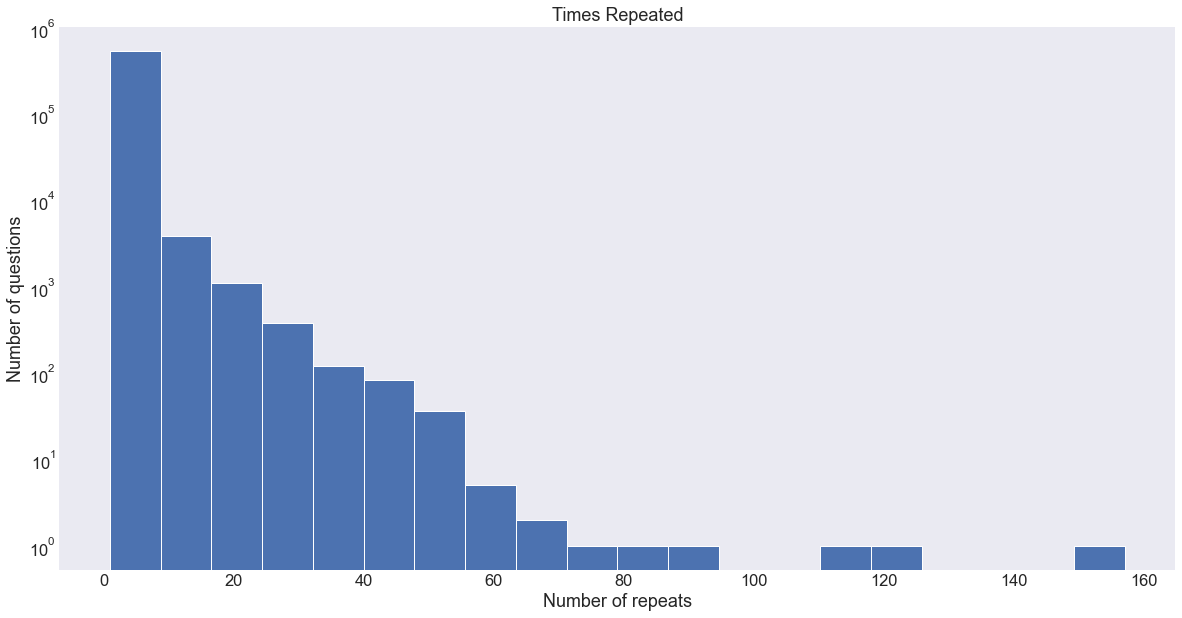

In [22]:
plt.figure(figsize=(20, 10))
plt.hist(qid_list.value_counts(), bins=20)
plt.title('Times Repeated')
plt.xlabel('Number of repeats')
plt.ylabel('Number of questions')
plt.yscale('log')

print ('Maximum number of times a single question is repeated {}'.format(max(qid_list.value_counts()))) 

In [23]:
df.isnull().sum()

id                  0
qid1                0
qid2                0
question1           1
question2           2
is_duplicate        0
q1_num_words        0
q2_num_words        0
total_num_words     0
differ_num_words    0
dtype: int64